<a id='top'></a>

# Homework 3: Normals and More Simulation
***

**Name**: 

***

This assignment is due on Canvas by **MIDNIGHT on Friday October 25**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | 

---

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
import math
%matplotlib inline

<br>

---
<a id='p1'></a>
[Back to top](#top)

<img src="https://media.daysoftheyear.com/20171223112636/hedgehog-day1.jpg" style="width: 500px;"/>


### [25 points] Problem 1

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{6}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your plot and axes!

---
To start be determining c, we must find c such that: $\int_{-\infty}^{\infty} cxe^{\left(-\frac{x^2}{6}\right)} = 1$

So to simplify right off the bat, the lower bound can be changed to 0 because $\int_{-\infty}^{0} f(x)\ dx = 0$.

Now, using substitution:

$u = - \frac{x^2}{6}$

$\frac{du}{dx} = - \frac{x}{3}$

$dx = - \frac{3}{x}\ du$

Now actually using these values in our integral:

$c \int_{0}^{\infty}xe^{\left(-\frac{x^2}{6}\right)}\ dx = -c \int_{0}^{\infty} xe^{u} \frac{3}{x}\ du = -3c \int_{0}^{\infty} e^{u}\ du$ 

Which can be written as:

$-3c\left(e^u\right)\Big|_{0}^{\infty} = -3c\left(e^{\left(-\frac{x^2}{6}\right)}\right)\Big|_{0}^{\infty}$

So now we need to find the limit as x approaches infinity of this antiderivative:

$lim_{x\to \infty} e^{\left(-\frac{x^2}{6}\right)} = 0$

Finally, we have:

$-3c\left(e^{\left(-\frac{x^2}{6}\right)}\right)\Big|_{0}^{\infty} = -3c\left(0-1\right) = 3c$

So now if we set $3c$ equal to $1$, we'd have the constant such that we have a proper probability density function. In our case, it is arbitrarily easy to see that $\boxed{c=\frac{1}{3}}$

This would make $f(x)$ look like this:

$$
f(x) = \begin{cases}
         \frac{1}{3} \ x \ e^{\left(-\frac{x^2}{6}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$

---

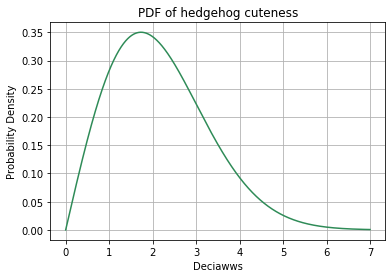

In [3]:
def my_pdf(x):
    exponent = (-x**2) / (6)
    return (1/3)*(x)*(np.exp(exponent))

x = np.arange(0, 7, 0.001)

p = my_pdf(x)

plt.plot(x, p, color='seagreen')

plt.title("PDF of hedgehog cuteness")
plt.xlabel("Deciawws")
plt.ylabel("Probability Density")
plt.grid()

plt.show()

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

---

The cdf of the above function is just the above pdf integrated on the interval $[0,\infty]$ similarly to how we integrated above:

For substitution:

$u = - \frac{x^2}{6}$

$\frac{du}{dx} = - \frac{x}{3}$

$dx = - \frac{3}{x}\ du$

$\int_{0}^{\infty}\frac{1}{3}xe^{\left(-\frac{x^2}{6}\right)}\ dx = \frac{1}{3} \int_{0}^{\infty} xe^{\left(-\frac{x^2}{6}\right)}\ dx = \frac{1}{3} \int_{0}^{\infty} -3e^u\ du = -\int_{0}^{\infty} e^u\ du = -e^u = -e^{\left(-\frac{x^2}{6}\right)}$

Now we just need to evaluate it on our interval:

$e^{\left(-\frac{x^2}{6}\right)} \Big |_{0}^{\infty}$

And as seen in **Part A** if we evaluate this expression:

$-e^{\left(-\frac{x^2}{6}\right)} \Big |_{0}^{x}$

We'd get:

$-e^{\left(-\frac{x^2}{6}\right)} - (-e^0) = -e^{\left(-\frac{x^2}{6}\right)} - (-1) = 1-e^{\left(-\frac{x^2}{6}\right)}$

So finally, the cdf is $\boxed{1-e^{\left(-\frac{x^2}{6}\right)}}$

---

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs.

---
The median: $\tilde{x}$ can be found by setting the cdf $F(x)$ equal to $0.5$ like so:

$1-e^{\left(-\frac{x^2}{6}\right)} = 0.5$

$ln\left(e^{\left(-\frac{x^2}{6}\right)}\right) = ln(0.5)$

$-\frac{x^2}{6} = ln(0.5)$

$x^2 = -6ln(0.5)$

$\tilde{x} = \sqrt{-6ln(0.5)}$

$\boxed{\tilde{x} = 2.0393}$

---

**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 3 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz.

Using $F(x)$ from above, we'd get an expression in the form:

$F(x) = 1-e^{\left(-\frac{x^2}{6}\right)}$

$P(3 \leq X \leq \infty) = F(\infty) - F(3) = (1-e^{\left(-\frac{\infty^2}{6}\right)}) - (1-e^{\left(-\frac{3^2}{6}\right)}) = (1-e^{-\infty}) - (1-e^{-1.5}) = (1-0) - (1-0.22313) = 1 - 0.77687 = 0.22313$

So, the probability we observe a hedgehog that is **totes adorbz** is $\boxed{0.22313}$

**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 6 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that at least 2 but not all of them are totes adorbz?

---
We could use a binomial distribution and add up 2, 3, 4, and 5 or we could just use the binomial cdf which computes X $\leq$ x rather than X = x (binom pdf). We would use the cdf of $x=5$ and then we'd subtract the cdf of $x=1$ because we dont want to include the cases where we only see 1 hedgehog that is **totes adorbz** and where we see no **totes adorbz** hedgehogs...

---

In [58]:
x5 = stats.binom.cdf(5, 6, 0.22313)

x1 = stats.binom.cdf(1, 6, 0.22313)

print(x5-x1)

0.40120923632565964


---
So as we can see in my python script above, we are using the stats binom distribution and the cdf function. the variable `x5` holds the binom.cdf value for 5 successes out of 6 trials, with a probability of 0.223313 of success. `x1` holds the binom.cdf value for 1 success out of 6 trials, with a probability of 0.223313 of success. Then I print the difference which is 0.40121, so we have a $40.121\%$ chance of seeing at least 2 (but not all 6) **totes adorbz** hedgehogs.

---

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

---
This integral would be denoted by: $\int_{0}^{\frac{\pi}{2}}\frac{1}{\pi}(cos(x)+1)\ dx$.

$\int_{0}^{\frac{\pi}{2}}\frac{1}{\pi}(\cos(x)+1) = \int_{0}^{\frac{\pi}{2}}\frac{1}{\pi}\cos(x)+\int_{0}^{\frac{\pi}{2}}\frac{1}{\pi}1 = \frac{1}{\pi}\left[\int_{0}^{\frac{\pi}{2}}\cos(x) + \int_{0}^{\frac{\pi}{2}}1 \right] = \frac{1}{\pi}\left[\sin(x) + x \right] \Big |_{0}^{\frac{\pi}{2}} = \frac{1}{\pi}\left[ (1+\frac{\pi}{2}) - (0+0) \right] = \boxed{\frac{1}{\pi} + \frac{1}{2} = 0.818309}$

Because $\pi$ is the largest score you can get, and $\frac{\pi}{2}$ is half of $\pi$ trivially, we are basically finding the probability of having a score at or below $\frac{\pi}{2}$. In terms of another example, if we were taking an exam, what we've done is the equivalent to finding the probability that someone scored a 50% or lower on the exam.

---

**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

Points Below Curve / Total Points =  0.52193


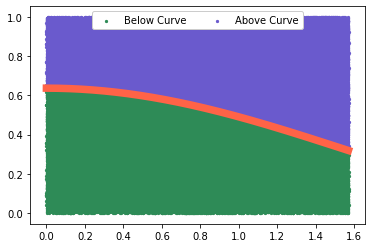

In [4]:
# This resource was fundamental in my understanding of this topic
# http://www.cs.toronto.edu/~guerzhoy/180/lectures/W10/lec2/MonteCarloInt.html

##########################################
# the pdf function
def f(x):
    return (1/np.pi)*(np.cos(x) + 1)
##########################################
# number of points to sample
num_points = 100000
##########################################
# For the rectangle described by X and Y #
x_low = 0
x_high = (np.pi/2)

y_low = 0
y_high = 1
##########################################
# The actual rectangle
X = np.random.uniform(x_low, x_high, num_points)
Y = np.random.uniform(y_low, y_high, num_points)
##########################################
# For plotting the pdf function
x = np.arange(x_low, x_high, 0.001)
y = f(x)
##########################################


ind_below = np.where(Y < f(X))
ind_above = np.where(Y >= f(X))

pts_below = plt.scatter(X[ind_below], Y[ind_below], color = "seagreen", s=5)
pts_above = plt.scatter(X[ind_above], Y[ind_above], color = "slateblue", s=5)
plt.plot(x, y, color="tomato", linewidth=7.5)

plt.legend((pts_below, pts_above),
           ('Below Curve', 'Above Curve'),
           loc='upper center',
           ncol=2,
           fontsize=10,
           framealpha=1)

print("Points Below Curve / Total Points = ", len(ind_below[0])/num_points)

---
Essentially we are literally just finding the ratio of points that fall under the curve out of all of the points that fall inside our rectangle.

---

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

In [5]:
print("Number of pts above the curve:", len(ind_above[0]))
print("Number of pts below the curve:", len(ind_below[0]))
print("N. below/N.total:", len(ind_below[0])/num_points)
print("Rectangle area:", y_high*(x_high-x_low))
print("Area under the curve:", y_high*(x_high-x_low)*len(ind_below[0])/num_points)

Number of pts above the curve: 47807
Number of pts below the curve: 52193
N. below/N.total: 0.52193
Rectangle area: 1.5707963267948966
Area under the curve: 0.8198457268440604


---
Essentially, we used 100,000 points to estimate the ratio, and we got 51,806 below the curve. This ratio becomes: 0.51806, and if we multiply this by the rectangular area of our random uniform sampling: 1.57079, we get: 0.813766 which is a rough estimate for the integral! **We must multiply the rectangular area by the ratio of points under the curve.**

---

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [55]:
# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!
def integrate(num_samples, ub, isPlot):
    
    #-----------------------------------------
    # your code goes here!  replace this junk:
    def f(x):
        return (1/np.pi)*(np.cos(x) + 1)
    
    estimate = 0
    sample_var = 1
    
    if ub == 0:
        return estimate, sample_var

    x_low = 0
    x_high = ub
    x = np.arange(x_low, x_high, 0.001)

    y_low = 0
    y_high = 1
    y = f(x)


    X = np.random.uniform(x_low, x_high, num_samples)
    Y = np.random.uniform(y_low, y_high, num_samples)

    ind_below = np.where(Y < f(X))
    ind_above = np.where(Y >= f(X))

    # not really sure if this is the variance that you're after...
    z = [1] * len(Y[ind_below])
    sample_var = np.var(z)
    
    if isPlot:
        pts_below = plt.scatter(X[ind_below], Y[ind_below], color = "seagreen",s=7.5)
        pts_above = plt.scatter(X[ind_above], Y[ind_above], color = "slateblue",s=7.5)
        
        plt.plot(x, y, color = "tomato", linewidth=2.5)

        plt.legend((pts_below, pts_above),
           ('Below Curve', 'Above Curve'),
           loc='upper center',
           ncol=2,
           fontsize=10,
           framealpha=1)

    estimate = y_high*(x_high-x_low)*len(ind_below[0])/num_samples
    #-----------------------------------------
    
    return estimate, sample_var

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

 - I believe `int_0_to_0` should be `0`

Second, what should your `integrate` function output if you plug in `ub=`$\pi$? Set that as `int_0_to_pi` below.

 - I believe `int_0_to_pi` should be `1`

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [47]:
### Note: There were times I had to run this cell multiple times...

int_0_to_0  = 0 # fill this in!
int_0_to_pi = 1 # this one too!

#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, np.pi, False)[0],int_0_to_pi,abs_tol=0.03), "Error: upper endpoint test failing"

**Part F.** Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

The estimated area under the curve from 0 to pi/2 is: 0.8177565677294231


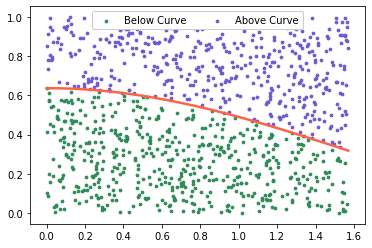

In [48]:
x1, _ = integrate(1000, np.pi/2, True)

x2, _ = integrate(10000, np.pi/2, False)

print("The estimated area under the curve from 0 to pi/2 is: {}".format(x2))

---
The estimated area under the curve from my integration function is incredibly close to what I computed by hand. Furthermore, I believe that my plot does a good job of visually representing the points lying above and below the function's curve.

---

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [25 points] Problem 3 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you're into that) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [195 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 180 mSv of radiation, with a standard deviation of 65 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 49 donuts out of the batch. Assume that your donuts follow the same distribution as that of the historical donuts.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

---
Well, disregarding the distribution the donuts actually follow using the Central Limit Theorem, we can assume our sample of 49 donuts produces a normal distribution. We'll just need to find our sample mean and standard deviation and then use z-scores to solve the rest of the problem.

$\sigma = 65\ \text{mSv}$

$s = \frac{65}{\sqrt{49}} = \frac{65}{7} = 9.286\ \text{mSv}$

$\mu = \overline{x} = 180\ \text{mSv}$

Using $s$ and $\overline{x}$ we can figure out what z-scores we need to lookup.

$\frac{195-180}{9.286} = \frac{15}{9.286} = 1.615  = 1.62 = \text{z-score}$

Using the **CLT** we know the sample distribution is roughly normal, so we must find the area under the curve to the right of +1.62 z-score past the mean. Because of this, we must find the probability at the z-score of +1.62 and we must subtract this from 1.

When the $\text{z-score}$ is $1.62$ we have a probability of $0.94738$ of our mean lying to the left of the $\text{z-score}$. When we subtract this from 1 we get $0.05262$, so we have a probability of $0.05262$ of getting a mean higher than 195 mSv and throwing out our donut batch given our sample.

If we want to find how often we'd throw out our donuts *generally* we could use the population mean and std. we'd get a z-score of $0.23$ which we must then subtract from 1 to get our answer. With our population values we'd likely throw out our donuts with a probability of $0.40905$.

Because the question is asking what the probability that we throw out any arbitrary donut batch, I believe we should be using the population values and thus we should throw out $40.91\%$ of donut batches. Also the reason 've come to this conclusion is that the next question opens up with "Yikes! Seems like those donuts might be dangerous" and the population values yield a higher likelihood of dangerous donuts than our sample does.

However, I've sort of changed my mind. If we are always bringing in the same amount of donuts and we are always sampling 49 of them, and our population values remain the same, and we need to inspect the donuts and their mean must be greater than 195 mSv, then I think we should use the sample values, and thus we'd have a $5.26\%$ chance of having to throw our donuts away.

---

In [54]:
print("Using population values:")
pop_std = 65 
print("\tThe pop std. sigma = {}".format(pop_std))

pop_z_score = (195-180) / pop_std
print("\tThe z-score = {}".format(pop_z_score))

pop_prob = 1-stats.norm.cdf(pop_z_score)
print("\tThe area under the curve to the right of our z-score = {}".format(pop_prob))

print("Using sample values:")
sample_std = pop_std / np.sqrt(49)
print("\tThe sample std. s = {}".format(sample_std))

samp_z_score = (195-180) / sample_std
print("\tThe z-score = {}".format(samp_z_score))

samp_prob = 1-stats.norm.cdf(samp_z_score)
print("\tThe area under the curve to the right of our z-score = {}".format(samp_prob))

Using population values:
	The pop std. sigma = 65
	The z-score = 0.23076923076923078
	The area under the curve to the right of our z-score = 0.4087470431816903
Using sample values:
	The sample std. s = 9.285714285714286
	The z-score = 1.6153846153846152
	The area under the curve to the right of our z-score = 0.05311371489000205


**Part B.** Yikes! Seems like those donuts might be dangerous, but you really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the maximum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.02?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

---
Using the z-table from last problem, we need to find a z-score that would leave us an area under the curve to the right of the z-score with slightly less than $0.02$. This z-score is: $-2.06$, but we'll need to make this the positive z-score of $2.06$. Then we'll need to solve for our new mean. Now, I'm not entirely sure what standard deviation to use here, so I will calculate using both again.

Using the population values, we'd need to solve for $x$ in the following equation:

$\frac{195-x}{65} = 2.06$

$195-x = 133.9$

$-x = -61.1$

$x = 61.1$

So we'd need $\mu = 61.1$ where we'd throw away $2\%$ of the batches.

If we had been using the sample values, we'd follow the same steps as above:

$\frac{195-x}{9.286} = 2.06$

$-x = -175.87$

$x = 175.87$

So we'd need $\overline{x} = 175.87$ where we'd throw away $2\%$ of the batches.

From reasoning through this problem and the other parts, I think we'd want to know the levels for our sample values, so the maximum mean we could have where we throw out $2\%$ of batches is $\overline{x} = 175.87$.

---

**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.02. However, she knows a differnat bakery that might be the solution. At Johnny's Super Consistent Baked Goods Emporium all the donuts are exactly the same in size, which means they are closer to being exactly the same in radiation content (less deviation). Suppose the mean and sample size are at their original values of $\mu = 190$ mSv and $n = 49$ mSv. What is the largest standard deviation to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

---
Similar to the previous part, we will have to solve for $x$ in the following equation. Also, I will *only* be using the sample values because I'm more sure these are values I'm after.

$\frac{195-180}{\frac{x}{7}} = 2.06$

$15 = 2.06\cdot \frac{x}{7}$

$7.282 = \frac{x}{7}$

$50.97 = x$

From here, we need our sample standard deviation to be $7.282$ or smaller which would force our population standard deviation to be equal or less than $50.97$ so we'd only throw out $2\%$ of the donuts.

---

 **Part D:** Since donuts of differant diameters absorb differant amounts of radiation it is easy to model the standard deviation of radiation content in terms of the standard deviation in donut size. Assume the function $RD$ below takes in the standard deviation in millimeters of donut diameter $(\sigma_d)$, and gives the radiation deviation in mSv.

$\begin{align}
    RD(\sigma_d) = \frac{5^{\sigma_d} \times 1mSv}{6mm}
\end{align}$

Johnny's bakes according to the following $\textit{"mathmatically"}$ correct donut size:

<img src="http://www.conquermaths.com/news/images/decinfo.jpg" style="width:300px;"/>

So they strive for a donut diameter of 72 - 82 mm, with less than 5mm of standard deviation. However, we're not taking their word for it. We've taken a sample of 36 donuts from Johnny's to determine if their low standard deviation satisfies our requirement of less than $0.02$ chance that we throw away our donuts. The observed standard deviation in donut size was 2.8mm. Assume that the mean radiation remains unchanged from the other donuts. Do Johnny's donuts satisfy our requirement of less than $0.02$ chance that we throw them away? 

---
Our observed standard deviation is $2.8$ from the 36 donuts sampled, so we'll have to plug this into $RD(\sigma_{d})$. This gives us:

$RD(2.8) = \frac{5^{2.8}}{6}\ \text{mSv} = \frac{90.597}{6}\ \text{mSv} = 15.0996\ \text{mSv}$

I don't believe these new donuts satisfy our requirement, but I kinda think I've made a mistake somewhere. Unless we divide the $15.0996$ by $sqrt{36} = 6$, then we would have donuts that staisfy our requirement, but these sample vs. population values are confusing.

---

**Part D.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

---
I feel like a normal distribution wouldn't necessarily be great for modelling dangerous levels of radiation in our food because it may not be the most precise model. It's great for estimates and for larger populations, but in our small sample size, I feel like the values I was getting vs. the numbers I was getting with the population values made them unreliable.

---

<br>

---
<a/ id='p4'></a>
[Back to top](#top)

##  [25 points] Problem 4 - CDF Inversion Sampling

In notebook 12, we looked at one method many pieces of statistical software use to turn pseudorandom numbers coming from the $U(0,1)$ distribution into those with a normal distribution.  In this problem we examine another such method.

### a) Simulating an Exponential
#### i ) The exponential distribution has pdf $f(x)= \lambda e^{-\lambda x}$ for $x\ge 0$.  Use the following markdown cell to compute by hand the cdf of the exponential.

To find the **cdf** given the exponential **pdf**, we must integrate the pdf to find the antiderivative. 

For some arbitrary variable c:

$\int_{0}^{\infty}\lambda e^{- \lambda c}\ dc = \left(-e^{- \lambda c}\right) \Big|_{0}^{\infty} = \lim_{x\to \infty} \left(-e^{- \lambda c}\right) \Big|_{0}^{x} = (-e^{- \lambda x}) - (-e^{0}) = (-e^{- \lambda x}) - (-1) = 1 - e^{- \lambda x}$

#### ii) The cdf is a function that takes x-values (or times, in the case of the exponential) and returns probabilities as the y-values.  Specifically, it returns the probability $P(X \leq x)$.  Find the *inverse* of this function, that takes as input probabilities and outputs times.

---
$F(x) = 1-e^{-\lambda x}$

$y = 1-e^{-\lambda x}$

$x = 1-e^{-\lambda y}$

$x+e^{-\lambda y} = 1$

$e^{-\lambda y} = 1 -x$

$ln(e^{-\lambda y}) = ln(1 -x)$

$-\lambda y = ln(1 -x)$

$\boxed{y = -\frac{1}{\lambda}ln(1 -x)}$

---


#### iii) Simulate 1000 random $U(0,1)$ variables.  Since these are numbers in $[0,1]$, we could think of them as random *probabilities*.  Plug them into the function you found in ii), then plot a histogram of the results.  Overlay the theoretical density of the exponential.  For each of these, use $\lambda=1/4$.

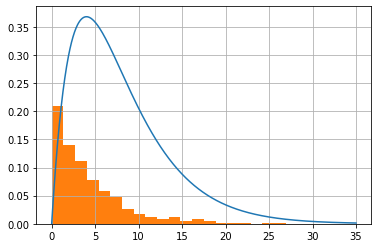

In [30]:
# my cdf
def f(x):
    lambda_var = 0.25
    return lambda_var * x * np.exp((-lambda_var) * (x))

def f_inverse(x):
    lambda_var = 0.25
    return (-(1)/(lambda_var)) * np.log(1-x)

# sample of random probabilities
# for plotting the histogram
sample = np.random.uniform(0,1,1000)
counts = f_inverse(sample)

# for plotting the pdf
x = np.linspace(0, 35, 1000)
points = f(x)

fig, ax = plt.subplots()

ax.plot(x, points)
ax.hist(counts, bins=20, density=True)

plt.grid()

### b) Simulating a new distribution
#### i) Consider a continuous random variable given by $f(x)=\frac{\sin(x)}{2}$ for $x \in [0, \pi]$.  Find the cdf and inverse cdf of X.

We can obtain the cdf by integrating $f(x)$ on the interval $[0, \pi]$ like this expression: $\int_{0}^{\pi} \frac{\sin(x)}{2} = \frac{1}{2} \int_{0}^{\pi} \sin(x) = \frac{1}{2}\left(-\cos(x)\right) \Big|_{0}^{\pi}$

But similarly to previous problems where we've had to integrate, integrating our pdf from $[0, \pi]$, we'll get an answer of 1. So we'll have to manipulate the bounds to be $[0, x]$. This will result in our cdf of:

$\frac{1}{2}\left(-\cos(x)\right) \Big|_{0}^{x} = \frac{1}{2}\left(-\cos(x)-(-\cos(0))\right) = \frac{1}{2}\left(-\cos(x)-(-1))\right) = \frac{1}{2}\left(-\cos(x)+1\right) = \boxed{\frac{1}{2}-\frac{1}{2}\cos(x)}$

Now to find the inverse of the cdf:

$y = \frac{1}{2}-\frac{1}{2}\cos(x)$

$x = \frac{1}{2}-\frac{1}{2}\cos(y)$

$x - \frac{1}{2}= -\frac{1}{2}\cos(y)$

$-2(x - \frac{1}{2}) = \cos(y)$

$-2x + 1 = \cos(y)$

$\cos^{-1}(1-2x) = y$

$\boxed{y = \cos^{-1}(1-2x)}$


#### ii) Simulate draws from X by simluating 1000 $U[0,1]$ random variables and plugging them into the inverse cdf you just found.  As in part a), plot a histogram of the random variables against their density function.

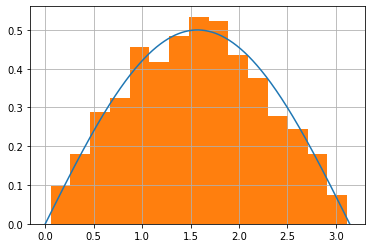

In [34]:
# my pdf
def f(x):
    return (0.5)*np.sin(x)

def f_inverse(x):
    return np.arccos(1-(2*x))

# sample of random probabilities
# for plotting the histogram
sample = np.random.uniform(0,1,1000)
counts = f_inverse(sample)

# for plotting the pdf
x = np.linspace(0, np.pi, 1000)
points = f(x)

fig, ax = plt.subplots()

ax.plot(x, points)
ax.hist(counts, bins=15, density=True)

plt.grid()

### c) Generalizing

Describe in words how this process might work on a discrete random variable.  You may use the Bernoulli as an example, if you wish.

This process would work identically, because we know the pdf of the bernoulli is:

$\textbf{pdf}_{Bernoulli}(x) = p^x(1-p)^{1-x}$

The cdf is a step function, so the histogram should look incredibly similar to the step function. As for taking the inverse of the cdf, I believe the process would be very similar and it would model this nicely.